#Astr400B
#Yuxuan Chen
#2/20/2020

In [1]:
import numpy as np
import astropy.units as u
from ReadFile import Read
from CenterOfMass import CenterOfMass
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#From Part 5, Circular Velocity it asked
from astropy.constants import G
G_new = G.to(u.kpc * u.km**2/u.s**2/u.Msun)

#below is the class function, and define each functions we need


In [3]:
class MassProfile:
    #Inputs
    #     Self, g, s
    #     g: A String with Galaxy Name
    #     s: Snapshot Number
    def __init__(self,g,s):
        #add a string of the filenumber to value '000'
        ilbl = '000' + str(s)
        #remove all but the last 3 digits
        ilbl = ilbl[-3:]
        self.filename = "%s_"%(g) + ilbl + '.txt'
        #Next read in the data for the x,y,z positions and mass.
        #Store x, y,z with appropriate units
        #Dont assign the mass units just yet
        #Inputs
        #    time = time
        #    total = total number
        #    data
        self.time, self.total, self.data = Read(self.filename)
        
        
        self.m = self.data["m"]
        self.x = self.data["x"]*u.kpc
        self.y = self.data["y"]*u.kpc
        self.z = self.data["z"]*u.kpc
        #r = magnitude of x y z, 
        #Store the name of galaxy as a global property self.gname
        self.gname = g
        
    #Part 2: Mass Enclosed
    #Create a function called MasseEnclosed that will compute the mass enclosed
    #with given radius of the COM posotion for a specificed galaxy and a specific
    #component of that galaxy.
    #Inputs
    #     self, ptype = particle type, r = magnitude of x,y,z(radius)
    def MassEnclosed(self, ptype, r):
        #COM,COMP used the function and result from Homework4
        
        COM = CenterOfMass(self.filename, ptype) 
        COMP = COM.COM_P(0.1)
        #declear partticle index 
        index = np.where(self.data['type'] == ptype)
        #Same as Homework4, now lets, calculate each centermass position(length)
        #x axis length by center mass
        x2 = self.x[index].value - COMP[0].value
        #y axis length by center mass
        y2 = self.y[index].value - COMP[1].value
        #z axis length by center mass
        z2 = self.z[index].value - COMP[2].value
        #magnitude of x, y, z, yeah the radius in 3 dimension
        r2 = np.sqrt(x2**2 + y2**2 + z2**2)
        #As the file said the units of mass is 1e10Msun
        m2 = self.m[index]*1e10
        
        #This part Yuanjea helped me
        
        #The function is used to make a array, according to size of radius array
        m_array = np.zeros(np.size(r))
        
        #size(R) can calculate length of the matrix, and we can get the total numbers for loop
        for i in range(np.size(r)):
            
            index2 = np.where(r2<r[i])
            
            M = np.sum(m2[index2]) 
        
            m_array[i] = M
                 
        return m_array*u.Msun
    
    #Part 3 : Total Mass Enclosed
    #Takes as input an array of radii(1D)
    #Calls MassEnclosed to compute the mass enclosed within the radius array
    #for each particle types(bulge, disk and halo)
    def MassEnclosedTotal(self, r):
        #MET stands for Mass Enclosed Total
        MET_halo = self.MassEnclosed(1,r)
        MET_disk = self.MassEnclosed(2,r)
        MET_bulge = self.MassEnclosed(3,r)
        #Sum the masses
        return MET_halo + MET_disk + MET_bulge
    
    #cause M33 does not have bulge, and from above function
    #I can not get the result, so I write a special case for
    #M33
    def M33EnclosedTotal(self, r):
        #MET stands for Mass Enclosed Total
        MET_halo = self.MassEnclosed(1,r)
        MET_disk = self.MassEnclosed(2,r)
        #Sum the masses, cause M33 no bulge
        return MET_halo + MET_disk
    
    #Part4 : Hernquist Mass Profile
    #Inputs
    #Self, r = radius,scale_factor, mass of halo
    def HernquistMass(self,r,scale_factor,M_halo):
        return (M_halo * r**2 )/ (scale_factor + r)**2
    
    
    #Part 5 : Circular Velocity
    #Create a function called CircularVelocity with:
    #inputs: the partcile type and an array with radii
    #returns an array of circular speds in units of km/s
    #rounded to two decimal places
    def CircularVelocity(self,ptype,r):
        
        #calculate the mass we need from MassEnclosed function
        m = self.MassEnclosed(ptype,r)
        Vc = np.sqrt(G_new * m/(r* u.kpc))
        
        #Returns the circular velocity rounded to 2 decimal places
        return np.around(Vc,2)
     
    #Part6 : TOtal Circular Velocity
    #Create a function called CircularVelocityTotal that:
    #Takes as input an array of radii
    # Retruns an array of circular velocity
    def CircularVelocityTotal(self,r):
        
        #repeat part 5 steps but change functions
        m_total = self.MassEnclosedTotal(r)
        Vctotal = np.sqrt(G_new * m_total/(r * u.kpc))
        #Returns the circular velocity total rounded to 2 decimal places
        return np.around(Vctotal,2)
    
    #Same case as for EncloseTotalMass for M33, cause M33 no buldge
    #write its own function is easy than write mutiply 'if ' conditions
    def CircularVelocityTotalM33(self,r):
        
        #repeat part 5 steps but change functions
        m_total = self.M33EnclosedTotal(r)
        Vctotal = np.sqrt(G_new * m_total/(r * u.kpc))
        #Returns the circular velocity total rounded to 2 decimal places
        return np.around(Vctotal,2)
    
    
    #Part 7 : Hernquist Circular Speed
    #Create a function called HerquistVCirc that computes the circular speed
    # using the Hernquist mass profile. You can either call HerquistMass or
    #write out actual equation
    def HernquistVCirc(self,r,scale_factor,M_halo):
        #same as the steps as part 5, 6, but change funtion
        m_Hernquist = self.HernquistMass(r,scale_factor,M_halo)
        return np.sqrt(G_new * m_Hernquist/(r*u.kpc))
        
        
        

In [5]:
#get Enclosed mass and total enclosed mass from MW
MW = MassProfile('MW',0)
r = np.arange(0.1,30.0,0.25)
MWhalo = MW.MassEnclosed(1,r)
MWdisk = MW.MassEnclosed(2,r)
MWbulge = MW.MassEnclosed(3,r)
MWtotal = MW.MassEnclosedTotal(r)



In [6]:
#get Enclosed mass and total enclosed mass from M31
M31 = MassProfile('M31',0)
r = np.arange(0.1,30.0,0.25)
M31halo = M31.MassEnclosed(1,r)
M31disk = M31.MassEnclosed(2,r)
M31bulge = M31.MassEnclosed(3,r)
M31total = M31.MassEnclosedTotal(r)


In [7]:
#get Enclosed mass and total enclosed mass from M33, and M33 no bulge
M33 = MassProfile('M33',0)
r = np.arange(0.1,30.0,0.25)
M33halo = M33.MassEnclosed(1,r)
M33disk = M33.MassEnclosed(2,r)
M33total = M33.M33EnclosedTotal(r)

Text(0.5, 1.0, 'MW Mass Profile plot')

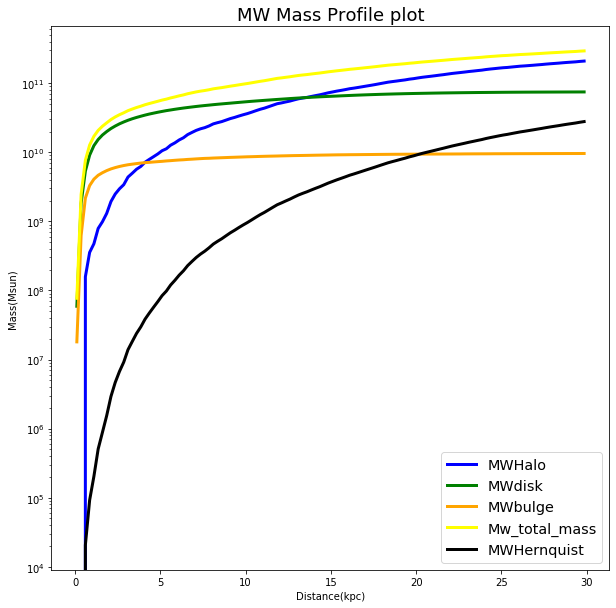

In [19]:
#Plot code reference is from Lab3/Lab4
#MW Mass profile plot
M_Her = MW.HernquistMass(r,52,MWhalo)
#Other index did not work, 10x10, 111, I asked 10x10 111 from Yuanjea
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

plt.semilogy(r,MWhalo,'blue',linewidth=3,label='MWHalo')
plt.semilogy(r,MWdisk,'green',linewidth=3,label='MWdisk')
plt.semilogy(r,MWbulge,'orange',linewidth=3,label='MWbulge')
plt.semilogy(r,MWtotal,'yellow',linewidth=3,label='Mw_total_mass')
plt.semilogy(r,M_Her,'black',linewidth=3,label='MWHernquist')
legend = ax.legend(loc='lower right',fontsize='x-large')
plt.xlabel('Distance(kpc)')
plt.ylabel('Mass(Msun)')
plt.title('MW Mass Profile plot',fontsize=18)

Text(0.5, 1.0, 'M31 Mass Profile plot')

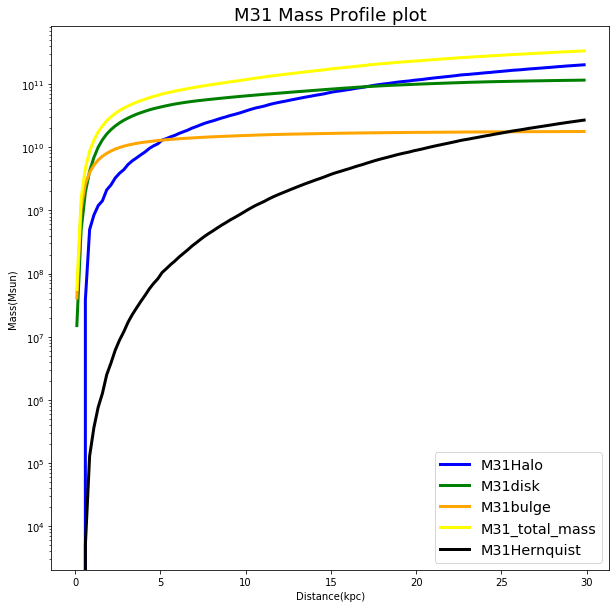

In [20]:
#Plot code reference is from Lab3/Lab4
#Mass profile of M31 plot
M31_Her = M31.HernquistMass(r,52,M31halo)
#Other index did not work, 10x10, 111, I asked 10x10 111 from Yuanjea
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

plt.semilogy(r,M31halo,'blue',linewidth=3,label='M31Halo')
plt.semilogy(r,M31disk,'green',linewidth=3,label='M31disk')
plt.semilogy(r,M31bulge,'orange',linewidth=3,label='M31bulge')
plt.semilogy(r,M31total,'yellow',linewidth=3,label='M31_total_mass')
plt.semilogy(r,M31_Her,'black',linewidth=3,label='M31Hernquist')
legend = ax.legend(loc='lower right',fontsize='x-large')
plt.xlabel('Distance(kpc)')
plt.ylabel('Mass(Msun)')
plt.title('M31 Mass Profile plot',fontsize=18)

Text(0.5, 1.0, 'M33 Mass Profile plot')

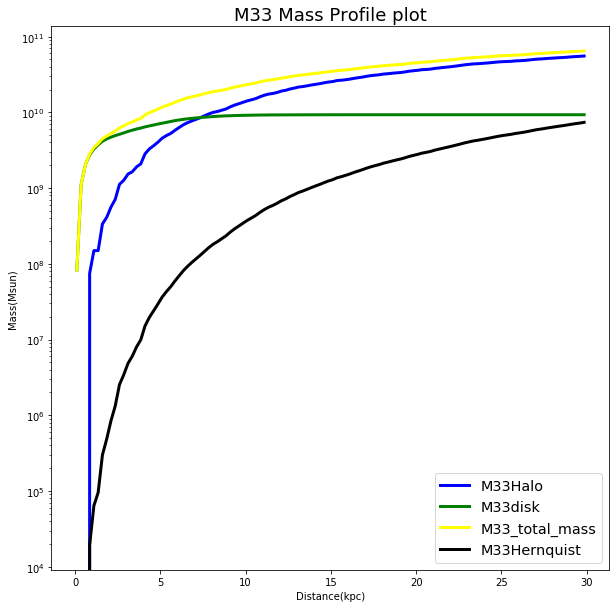

In [21]:
#M33 Mass profile plot
M33_Her = M33.HernquistMass(r,52,M33halo)
#Other index did not work, 10x10, 111, I asked 10x10 111 from Yuanjea
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

plt.semilogy(r,M33halo,'blue',linewidth=3,label='M33Halo')
plt.semilogy(r,M33disk,'green',linewidth=3,label='M33disk')
plt.semilogy(r,M33total,'yellow',linewidth=3,label='M33_total_mass')
plt.semilogy(r,M33_Her,'black',linewidth=3,label='M33Hernquist')
legend = ax.legend(loc='lower right',fontsize='x-large')
plt.xlabel('Distance(kpc)')
plt.ylabel('Mass(Msun)')
plt.title('M33 Mass Profile plot',fontsize=18)

In [9]:
#get Circular Velocity/total from MW, and HernquistCircular Speed
r = np.arange(0.1,30.0,0.25)
MWV1 = MW.CircularVelocity(1,r)
MWV2 = MW.CircularVelocity(2,r)
MWV3 = MW.CircularVelocity(3,r)
MWVtotal = MW.CircularVelocityTotal(r)
MWHV = MW.HernquistVCirc(r,52,MWhalo)

Text(0.5, 1.0, 'MW Rotation Curve')

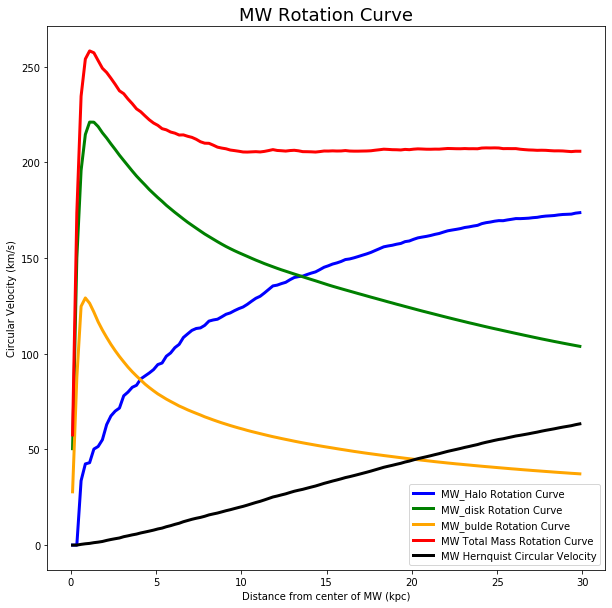

In [22]:
#after getting Circular Velocity/total from MW, and HernquistCircular Speed
#we can plot the rotation curve plot
r = np.arange(0.1,30.0,0.25)
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
plt.plot(r,MWV1,'blue',linewidth=3,label='MW_Halo Rotation Curve')
plt.plot(r,MWV2,'green',linewidth=3,label='MW_disk Rotation Curve')
plt.plot(r,MWV3,'orange',linewidth=3,label='MW_bulde Rotation Curve')
plt.plot(r,MWVtotal,'red',linewidth=3,label='MW Total Mass Rotation Curve')
plt.plot(r,MWHV,'black',linewidth=3,label='MW Hernquist Circular Velocity')
legend = ax.legend(loc='lower right')
plt.xlabel('Distance from center of MW (kpc)')
plt.ylabel('Circular Velocity (km/s)')
plt.title('MW Rotation Curve',fontsize=18)

In [12]:
#To calculate Circular Velocity/total from M31, and HernquistCircular Speed
M31V1 = M31.CircularVelocity(1,r)
M31V2 = M31.CircularVelocity(2,r)
M31V3 = M31.CircularVelocity(3,r)
M31Vtotal = M31.CircularVelocityTotal(r)
M31HV = M31.HernquistVCirc(r,52,M31halo)

Text(0.5, 1.0, 'M31 Rotation Curve')

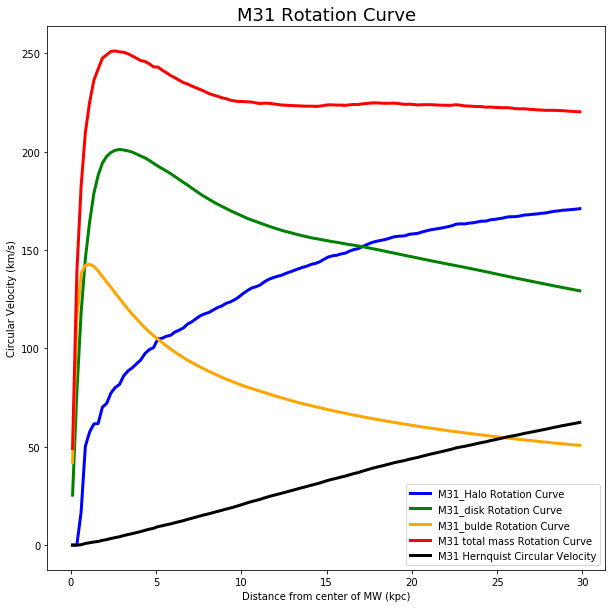

In [23]:
#after getting Circular Velocity/total from M31, and HernquistCircular Speed
#we can plot the rotation curve plot
r = np.arange(0.1,30.0,0.25)
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
plt.plot(r,M31V1,'blue',linewidth=3,label='M31_Halo Rotation Curve')
plt.plot(r,M31V2,'green',linewidth=3,label='M31_disk Rotation Curve')
plt.plot(r,M31V3,'orange',linewidth=3,label='M31_bulde Rotation Curve')
plt.plot(r,M31Vtotal,'red',linewidth=3,label='M31 total mass Rotation Curve')
plt.plot(r,M31HV,'black',linewidth=3,label='M31 Hernquist Circular Velocity')
legend = ax.legend(loc='lower right')
plt.xlabel('Distance from center of MW (kpc)')
plt.ylabel('Circular Velocity (km/s)')
plt.title('M31 Rotation Curve',fontsize=18)

In [24]:
#To calculate Circular Velocity/total from M33, and HernquistCircular Speed
#And there is no bulge values
M33V1 = M33.CircularVelocity(1,r)
M33V2 = M33.CircularVelocity(2,r)
M33Vtotal = M33.CircularVelocityTotalM33(r)
M33HV = M33.HernquistVCirc(r,23,M33halo)

Text(0.5, 1.0, 'M33 Rotation Curve')

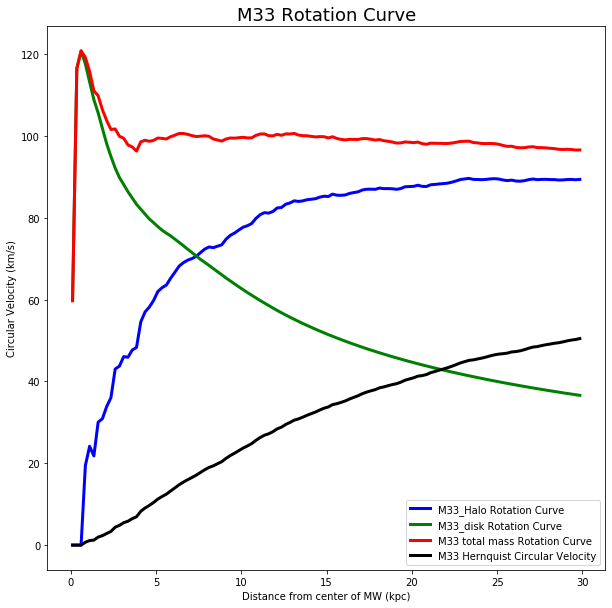

In [25]:
#after getting Circular Velocity/total from M33, and HernquistCircular Speed
#we can plot the rotation curve plot
r = np.arange(0.1,30.0,0.25)
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
plt.plot(r,M33V1,'blue',linewidth=3,label='M33_Halo Rotation Curve')
plt.plot(r,M33V2,'green',linewidth=3,label='M33_disk Rotation Curve')
plt.plot(r,M33Vtotal,'red',linewidth=3,label='M33 total mass Rotation Curve')
plt.plot(r,M33HV,'black',linewidth=3,label='M33 Hernquist Circular Velocity')
legend = ax.legend(loc='lower right')
plt.xlabel('Distance from center of MW (kpc)')
plt.ylabel('Circular Velocity (km/s)')
plt.title('M33 Rotation Curve',fontsize=18)